In [1]:
from scipy import integrate
from scipy import stats
import random
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Single-Gene Model

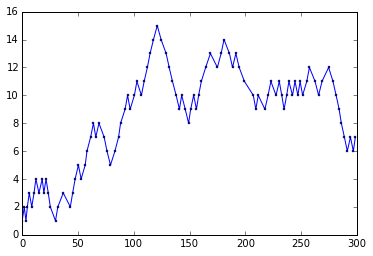

In [9]:
# set parameters
beta = 1   # transcription (txn)
alpha = 0.1  # degradation
g0 = 1    # Initial Number of molecule
t0 = 0     # time point
iterationNum = 100 # number of iterations

# simulation
g = [g0]
time = [t0]
for idx in range(iterationNum):
    probRXN_txn = beta / (beta + alpha * g[idx])
    
    # decide reaction
    dice1 = stats.bernoulli.rvs(probRXN_txn, size = 1)
    
    # Reaction occur
    if dice1 == 1:
        g.append( g[idx] + 1 ) # transcrition
    else:
        g.append( g[idx] - 1 ) # degradation
        
    # generate the time interval
    probRXN = beta + alpha * g[idx]
    interval = stats.expon.rvs(probRXN, size = 1)
    time.append( time[idx] + interval )
    
# plot the result
fig, ax = plt.subplots(1, 1)
ax.plot(time, g, '-o', markersize = 2)

# Two-Gene Model

Positive Feedback Model of Two Gene Model
- In this section, the goal is to build a positive feedback model that involves two genes

After dimensionless the formula, the model is built and rewritten as the following: 

$$\frac{dx}{dt} = \beta_1 * \frac{y^{n2}}{k_2^{n_2}+y^{n_2}} - \alpha_1*x$$

$$\frac{dy}{dt} = \beta_2 * \frac{x^{n1}}{k_1^{n_1}+x^{n_1}} - \alpha_2*y$$

In [183]:
def process(x_0, y_0,beta0 = 0, beta1 = 1, beta2 = 1, alpha1 = 1, alpha2 = 1, n1 = 1, n2 = 1, k1 = 1, k2 = 1, iterations = 10):
    # initialize
    X = [x_0]
    Y = [y_0]
    time = [0]
    
    for idx in range(iterations):
        # reactions
        probRXN01 = beta0 + beta1 * Y[idx]**n2 / (k2**n2 + Y[idx]**n2)
        probRXN02 = alpha1 * X[idx]
        probRXN11 = beta0 + beta2 * X[idx]**n1 / (k1**n1 + X[idx]**n1)
        probRXN12 = alpha2 * Y[idx]
        probRXN = probRXN01 + probRXN02 + probRXN11 + probRXN12
        
        # avoid error for deivided by zero value
        #if (X[idx] == 0 or Y[idx] == 0):
        #    print("X, Y have all been degraded...")
        #    return np.array([time, X, Y])     
            
        # decide which reaction
        #print(X[idx], Y[idx])
        #print([probRXN01, probRXN02, probRXN11, probRXN12])
        rxn = np.random.multinomial(1, [probRXN01/probRXN, probRXN02/probRXN, probRXN11/probRXN, probRXN12/probRXN], size=1)[0]
        
        # reaction occur
        X.append(X[idx] + rxn[0] - rxn[1])
        Y.append(Y[idx] + rxn[2] - rxn[3])
        
        # generate the time interval
        interval = stats.expon.rvs(probRXN, size = 1)
        time.append( time[idx] + interval )
        
    return np.array([time, X, Y])

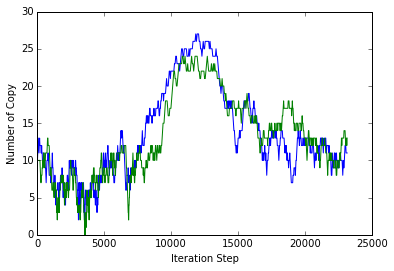

In [190]:
# set paramters
BETA0 = 1
BETA1 = 20
BETA2 = 20
ALPHA1 = 0.5
ALPHA2 = 0.5
k1 = 20
k2 = 20
n1 = 2
n2 = 2

# initial value
x0 = 10
y0 = 10

# iterations
iterations = 1000

# simulation
result = process(x0, y0, beta0 = BETA0, 
                         beta1 = BETA1, 
                         beta2 = BETA2, 
                         alpha1 = ALPHA1,
                         alpha2 = ALPHA2,
                         k1 = k1,
                         k2 = k2,
                         n1 = n1,
                         n2 = n2,
                         iterations = iterations)

# plot
plt.plot(result[0], result[1])
plt.plot(result[0], result[2])
plt.xlabel("Iteration Step")
plt.ylabel("Number of Copy")

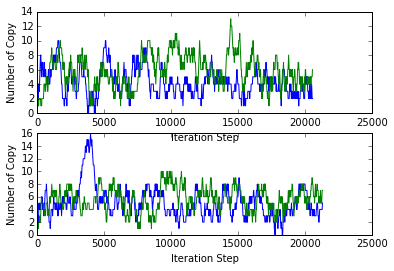

In [179]:
fig, ax = plt.subplots(2, 1)

x0 = 2
y0 = 2

result = process(x0, y0, beta0 = BETA0, 
                         beta1 = BETA1, 
                         beta2 = BETA2, 
                         alpha1 = ALPHA1,
                         alpha2 = ALPHA2,
                         k1 = k1,
                         k2 = k2,
                         n1 = n1,
                         n2 = n2,
                         iterations = iterations)

ax[0].plot(result[0], result[1])
ax[0].plot(result[0], result[2])
ax[0].set_xlabel("Iteration Step")
ax[0].set_ylabel("Number of Copy")

x0 = 1
y0 = 1

result = process(x0, y0, beta0 = BETA0, 
                         beta1 = BETA1, 
                         beta2 = BETA2, 
                         alpha1 = ALPHA1,
                         alpha2 = ALPHA2,
                         k1 = k1,
                         k2 = k2,
                         n1 = n1,
                         n2 = n2,
                         iterations = iterations)

ax[1].plot(result[0], result[1])
ax[1].plot(result[0], result[2])
ax[1].set_xlabel("Iteration Step")
ax[1].set_ylabel("Number of Copy")

count the result

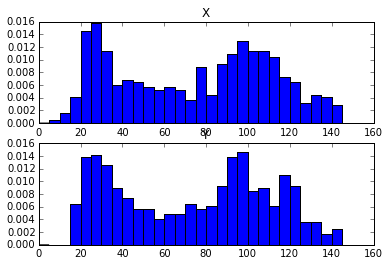

In [218]:
# set paramters
BETA0 = 10
BETA1 = 100
BETA2 = 100
ALPHA1 = 0.5
ALPHA2 = 0.5
k1 = 100
k2 = 100
n1 = 3
n2 = 3

# initial value
x0 = 70
y0 = 70

# iterations
iterations = 1000
numCells = 500

# container
resX = []
resY = []
results = []

for idx in range(numCells):
    
    result = process(x0, y0, beta0 = BETA0, 
                         beta1 = BETA1, 
                         beta2 = BETA2, 
                         alpha1 = ALPHA1,
                         alpha2 = ALPHA2,
                         k1 = k1,
                         k2 = k2,
                         n1 = n1,
                         n2 = n2,
                         iterations = iterations)
    
    results.append(result)
    resX.append(result[1][-1])
    resY.append(result[2][-1])

fig, ax = plt.subplots(2, 1)
ax[0].hist(resX, normed = True, bins=range(0, 150, 5))
ax[0].set_title("X")

ax[1].hist(resY, normed = True, bins=range(0, 150, 5))
ax[1].set_title("Y")

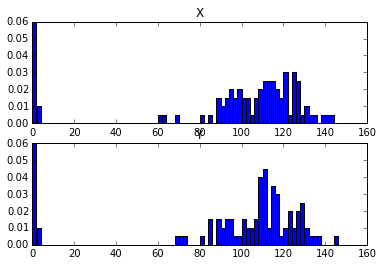

In [210]:
fig, ax = plt.subplots(2, 1)
ax[0].hist(resX, normed = True, bins=range(0, 150, 2))
ax[0].set_title("X")

ax[1].hist(resY, normed = True, bins=range(0, 150, 2))
ax[1].set_title("Y")

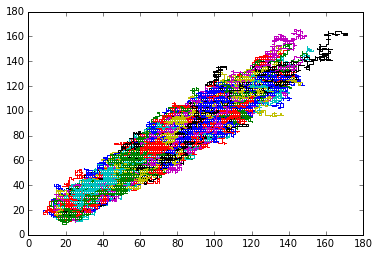

In [228]:
fig, ax = plt.subplots(1, 1)
for idx in range(500):
    ax.plot(results[idx][1], results[idx][2])

In [222]:
np.array(results)[1].shape

(3, 1001)